<a href="https://colab.research.google.com/github/iq5ch/machine-learning/blob/tugas3/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
!tar -xvf '/content/drive/MyDrive/Uni/UTKFace.tar.gz' -C '/content'

Streaming output truncated to the last 5000 lines.
UTKFace/33_1_0_20170111182452825.jpg.chip.jpg
UTKFace/26_1_1_20170116024053194.jpg.chip.jpg
UTKFace/25_1_0_20170109213232182.jpg.chip.jpg
UTKFace/28_1_1_20170112234526480.jpg.chip.jpg
UTKFace/57_0_0_20170117191704100.jpg.chip.jpg
UTKFace/27_1_1_20170117193211345.jpg.chip.jpg
UTKFace/46_1_1_20170116161237892.jpg.chip.jpg
UTKFace/24_0_2_20170116171647508.jpg.chip.jpg
UTKFace/42_1_1_20170113005712902.jpg.chip.jpg
UTKFace/25_1_1_20170116001337504.jpg.chip.jpg
UTKFace/40_1_0_20170116222110661.jpg.chip.jpg
UTKFace/50_1_0_20170109012257664.jpg.chip.jpg
UTKFace/26_1_3_20170104235421282.jpg.chip.jpg
UTKFace/7_0_0_20170110215711115.jpg.chip.jpg
UTKFace/1_1_2_20161219155353413.jpg.chip.jpg
UTKFace/26_0_1_20170117195651493.jpg.chip.jpg
UTKFace/7_0_0_20170110215648859.jpg.chip.jpg
UTKFace/64_0_0_20170117155540137.jpg.chip.jpg
UTKFace/48_0_0_20170109004813150.jpg.chip.jpg
UTKFace/39_0_0_20170103183230555.jpg.chip.jpg
UTKFace/45_0_1_20170117190019363

In [2]:
path_dir = 'UTKFace'

In [5]:
print(len(os.listdir(path_dir)))

23708


In [6]:
# Cek penamaan image
print(os.listdir(path_dir)[:10])

['58_0_0_20170113185223064.jpg.chip.jpg', '26_0_1_20170113135339953.jpg.chip.jpg', '82_0_0_20170111211328431.jpg.chip.jpg', '35_0_0_20170117172908485.jpg.chip.jpg', '50_1_1_20170112210916132.jpg.chip.jpg', '35_1_4_20170117203423144.jpg.chip.jpg', '31_1_0_20170103181436000.jpg.chip.jpg', '10_0_0_20170116201337172.jpg.chip.jpg', '26_1_1_20170116231102643.jpg.chip.jpg', '37_1_0_20170109003001568.jpg.chip.jpg']


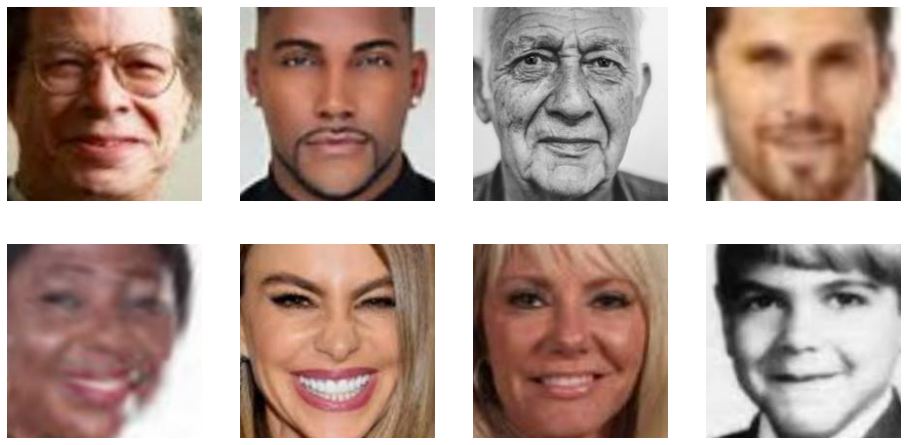

In [7]:
# Tampilkan contoh image
nrows = 2
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

next_img = [os.path.join(path_dir, fname) 
                for fname in os.listdir(path_dir)[0:8]]

for i, img_path in enumerate(next_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
pixels = []
age = []
gender = []
for f in os.listdir(path_dir):
  ages = f.split("_")[0]
  genders = f.split("_")[1]
  img = cv2.imread(str(path_dir)+"/"+str(f))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  pixels.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))
age = np.array(age,dtype=np.int64)
pixels = np.array(pixels)
gender = np.array(gender,np.uint64)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(pixels,age,random_state=100)
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(pixels,gender,random_state=100)

In [23]:
# Tampilkan jumlah data train dan test
print('total train images:', len(x_train))
print('total test images:', len(x_test))

total train images: 17781
total test images: 5927


In [21]:
# Tampilkan shape dari data train dan test
print("Train Data = ", x_train.shape)
print("Train Label = ", y_train.shape)
print("Test Data = ", x_test.shape)
print("Test Label = ", y_test.shape)

Train Data =  (17781, 200, 200, 3)
Train Label =  (17781,)
Test Data =  (5927, 200, 200, 3)
Test Label =  (5927,)


In [15]:
# Buat model
img_input = Input(shape=(200, 200, 3))
batch = BatchNormalization()(img_input)
x = Flatten()(batch)
# age
x_age = Dense(128, activation='relu')(x)
x_age = Dense(1, activation='relu')(x_age)
# gender
x_gender = Dense(128, activation='relu')(x)
x_gender = Dense(2, activation='softmax')(x_gender)

# Definisikan modelnya
model = Model(inputs=img_input, outputs=[x_age, x_gender])

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 200, 3)  12          input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 120000)       0           batch_normalization[0][0]        
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 128)          15360128    flatten_1[0][0]                  
____________________________________________________________________________________________

In [17]:
model.compile(optimizer="adam",loss=["mse","sparse_categorical_crossentropy"],metrics=['mae','accuracy'])

In [18]:
H = model.fit(x_train,[y_train,y_train_2],validation_data=(x_test,[y_test,y_test_2]),epochs=50)

Epoch 1/50
556/556 [==============================] - 293s 525ms/step - loss: 1566.1790 - dense_5_loss: 1563.4908 - dense_7_loss: 2.6863 - dense_5_mae: 33.4558 - dense_5_accuracy: 1.6872e-04 - dense_7_mae: 0.5000 - dense_7_accuracy: 0.7683 - val_loss: 1512.5941 - val_dense_5_loss: 1511.9624 - val_dense_7_loss: 0.6317 - val_dense_5_mae: 33.3860 - val_dense_5_accuracy: 0.0000e+00 - val_dense_7_mae: 0.5000 - val_dense_7_accuracy: 0.8205
Epoch 2/50
556/556 [==============================] - 299s 537ms/step - loss: 1502.6152 - dense_5_loss: 1502.0959 - dense_7_loss: 0.5186 - dense_5_mae: 33.2760 - dense_5_accuracy: 0.0000e+00 - dense_7_mae: 0.5000 - dense_7_accuracy: 0.8415 - val_loss: 1512.6880 - val_dense_5_loss: 1511.9624 - val_dense_7_loss: 0.7259 - val_dense_5_mae: 33.3860 - val_dense_5_accuracy: 0.0000e+00 - val_dense_7_mae: 0.5000 - val_dense_7_accuracy: 0.8284
Epoch 3/50
556/556 [==============================] - 299s 538ms/step - loss: 1502.5304 - dense_5_loss: 1502.0836 - dense_7_

In [20]:
model.save("model-utk.h5")

In [25]:
# Evaluate the model
result=model.evaluate(x_test)
print(f"test loss: {result[0]}, test accuracy: {result[1]}")

186/186 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - dense_5_loss: 0.0000e+00 - dense_7_loss: 0.0000e+00 - dense_5_mae: 0.0000e+00 - dense_5_accuracy: 0.0000e+00 - dense_7_mae: 0.0000e+00 - dense_7_accuracy: 0.0000e+00
test loss: 0.0, test accuracy: 0.0



---


In [26]:
from keras.models import load_model

In [36]:
# model_path = "./model-utk.h5"
# loaded_model = load_model(model_path)
# output_path = ""
img_path = "UTKFace/17_1_4_20170103222931966.jpg.chip.jpg"
pic = cv2.imread(img_path)
gray = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)

In [37]:
predict = model.predict(np.array(img).reshape(-1,200,200,3))
age_pred = predict[0]
gender_pred = np.argmax(predict[1])
if gender_pred == 0:
  gender_pred = 'Man'
else:
  gender_pred = 'Woman'

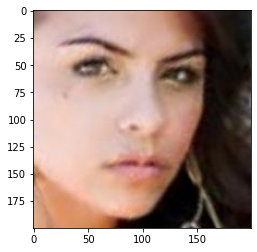

[[0.]] Woman


In [38]:
pic1 = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic1)
plt.show() 
print(age_pred, gender_pred)

**???**